In [4]:
# Install dependencies
!pip install numpy matplotlib

In [29]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt

from typing import Callable, List

## Chain Rule

In [24]:
ArrayFunction = Callable[[ndarray], ndarray]
Chain = List[ArrayFunction]


def apply(chain: Chain, input_: ndarray) -> ndarray:
    temp = input_
    for func in chain:
        temp = func(temp)

    return temp


def deriv(func: ArrayFunction, input_: ndarray, delta: float = 0.001) -> ndarray:
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)


def deriv_chain(chain: Chain, input_: ndarray, delta: float = 0.001) -> ndarray:
    answer = 1
    temp = input_
    for func in chain:
        answer *= deriv(func, temp, delta)
        temp = func(temp)
    return answer

chain: Chain = [
        lambda x: x + 1,
        lambda x: x * x,
        lambda x: x + 3,
]
print(apply(chain, np.array([1,2,3])))

chain2: Chain = [
    lambda x: np.power(x, 2),
    lambda x: np.exp(x),
]
a2 = np.array([1,2,3])
print(f"a2 = {a2}")
print(apply(chain2, a2))

d2 = deriv(chain2[0], a2)
print(f"deriv = {d2}")
assert np.allclose(d2, np.array([2,4,6]))

dc2 = deriv_chain(chain2, a2)
print(f"deriv_chain = {dc2}")
assert np.allclose(dc2, 2 * a2 * np.exp(np.power(a2, 2)))

[ 7 12 19]
a2 = [1 2 3]
[2.71828183e+00 5.45981500e+01 8.10308393e+03]
deriv = [2. 4. 6.]
deriv_chain = [5.43656456e+00 2.18392637e+02 4.86185117e+04]


### Drawing Graph to check deriv_chain

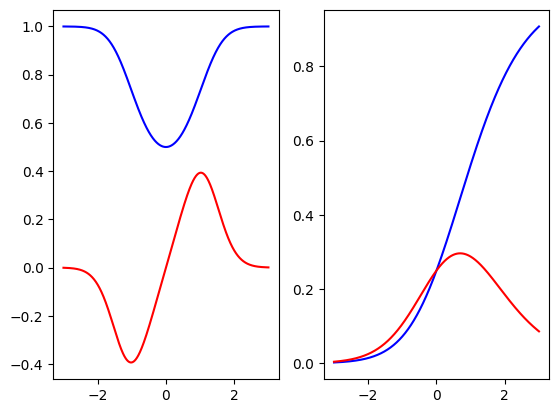

In [45]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-x))

def square(x : ndarray) -> ndarray:
    return np.power(x, 2)

chain3: Chain = [square, sigmoid]
chain4: Chain = [sigmoid, square]

xs = np.linspace(-3, 3, 1000)

y3s = np.array([apply(chain3, x) for x in xs])
dy3s = np.array([deriv_chain(chain3, x) for x in xs])

y4s = np.array([apply(chain4, x) for x in xs])
dy4s = np.array([deriv_chain(chain4, x) for x in xs])

_, axs = plt.subplots(1, 2)
axs[0].plot(xs, y3s, 'b-')
axs[0].plot(xs, dy3s, 'r-')

axs[1].plot(xs, y4s, 'b-')
axs[1].plot(xs, dy4s, 'r-')

plt.show()